In [1]:
import sys
sys.path.append('../')

import pandas as pd

In [2]:
competitors = pd.read_parquet('../data/raw/competitors.parquet.gzip')
parents = pd.read_parquet('../data/raw/parents.parquet.gzip')
partners = pd.read_parquet('../data/raw/partners.parquet.gzip')
suppliers = pd.read_parquet('../data/raw/suppliers.parquet.gzip')
info = pd.read_parquet('../data/raw/entity_info.parquet.gzip')
address = pd.read_parquet('../data/raw/addresses.parquet.gzip')

In [3]:
suppliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233753 entries, 0 to 233752
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   source_id    233753 non-null  int64  
 1   target_id    233753 non-null  int64  
 2   revenue_pct  14257 non-null   float64
 3   start_date   233753 non-null  object 
 4   source_name  233753 non-null  object 
 5   targte_name  233753 non-null  object 
 6   type         233753 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 12.5+ MB


In [4]:
parents.head()

,source_id,target_id,start_date,source_name,targte_name,type
0,265502,369980,2022-04-01,Linde Plc,"Wahlco Environmental Systems, Inc.",ULTIMATE_PARENT_OF
1,318,3840,2022-04-01,"Verizon Communications, Inc.",Western Wireless Corp.,ULTIMATE_PARENT_OF
2,292835,3841,2022-04-01,Truist Financial Corp.,"Main Street Banks, Inc. (Atlanta, Georgia)",ULTIMATE_PARENT_OF
3,1971,3843,2022-04-01,"The PNC Financial Services Group, Inc.",Yardville National Bancorp,ULTIMATE_PARENT_OF
4,25278,3844,2022-04-01,"Toray Industries, Inc.","Zoltek Cos., Inc.",ULTIMATE_PARENT_OF


In [5]:
parents.start_date.unique()

array(['2022-04-01', '2022-04-04'], dtype=object)

In [6]:
partners.head()

,source_id,target_id,start_date,source_name,targte_name,type
0,323302,97940,2021-12-08,"& Factory, Inc.",Amix Co. Ltd.,PARTNERS
1,323302,313319,2021-12-08,"& Factory, Inc.","Mirror Fit Co., Ltd.",PARTNERS
2,323302,150832,2021-12-08,"& Factory, Inc.",Housecom Corp.,PARTNERS
3,323302,313325,2021-12-08,"& Factory, Inc.",Miyoshi Real Estate Co. Ltd.,PARTNERS
4,323302,137558,2021-12-08,"& Factory, Inc.",Maeda & Co. Ltd.,PARTNERS


In [7]:
partners.start_date.unique()

array(['2021-12-08', '2019-07-10', '2020-05-19', ..., '2015-12-31',
       '2009-03-25', '2017-03-25'], dtype=object)

In [8]:
suppliers.head()

,source_id,target_id,revenue_pct,start_date,source_name,targte_name,type
0,46216,317277,NaN,2018-08-25,Ever Team Software SAS,GFI Informatique SA,SUPPLIES
1,323302,362405,12.0,2021-12-08,"& Factory, Inc.","Shogakukan, Inc.",SUPPLIES
2,323302,96117,34.1,2021-12-08,"& Factory, Inc.","Square Enix Holdings Co., Ltd.",SUPPLIES
3,323302,362527,19.5,2021-12-08,"& Factory, Inc.","Shueisha, Inc.",SUPPLIES
4,323304,282371,NaN,2021-02-17,(B. Y.) Medimor Ltd.,InMode Ltd.,SUPPLIES


In [9]:
info.head()

,id,sector,industry,nace_description,code
0,93528,Process Industries,Agricultural Commodities/Milling,"Growing of cereals (except rice), leguminous c...",01.11
1,72520,Process Industries,Agricultural Commodities/Milling,"Growing of cereals (except rice), leguminous c...",01.11
2,64667,Process Industries,Agricultural Commodities/Milling,"Growing of cereals (except rice), leguminous c...",01.11
3,278227,Process Industries,Agricultural Commodities/Milling,"Growing of cereals (except rice), leguminous c...",01.11
4,72518,Process Industries,Agricultural Commodities/Milling,"Growing of cereals (except rice), leguminous c...",01.11


In [10]:
address.head()

,id,name,country,city_state_postal,location_street1
0,50472,"Infinity Pharmaceuticals, Inc.",USA,"Cambridge, MA 02138",1100 Massachusetts Avenue
1,282940,"Bozhon Precision Industry Technology Co., Ltd.",CHN,"Suzhou, Jiangsu 215222",666 Huxin West Road
2,313953,Quaker Houghton,USA,"Conshohocken, PA 19428-2380",One Quaker Park
3,1441,Kohl's Corp.,USA,"Menomonee Falls, WI 53051",N56 West17000 Ridgewood Drive
4,135666,"Sorrento Therapeutics, Inc.",USA,"San Diego, CA 92121",4955 Directors Place


In [11]:
address.dropna()

,id,name,country,city_state_postal,location_street1
0,50472,"Infinity Pharmaceuticals, Inc.",USA,"Cambridge, MA 02138",1100 Massachusetts Avenue
1,282940,"Bozhon Precision Industry Technology Co., Ltd.",CHN,"Suzhou, Jiangsu 215222",666 Huxin West Road
2,313953,Quaker Houghton,USA,"Conshohocken, PA 19428-2380",One Quaker Park
3,1441,Kohl's Corp.,USA,"Menomonee Falls, WI 53051",N56 West17000 Ridgewood Drive
4,135666,"Sorrento Therapeutics, Inc.",USA,"San Diego, CA 92121",4955 Directors Place
...,...,...,...,...,...
195917,253041,Australian Unity Office Fund,AUS,"Melborne, Victoria (VIC) 3000",271 Spring Street
195918,81229,Nabisco Brands Ltd.,CAN,"Dresden, ON N0P 1M0",759 Wellington Drive
195919,102791,"Pal Technologies, Inc.",USA,"Fairfax, VA 22030",3201 Jermantown Road
195921,176574,Akzo Nobel Pakistan Ltd.,PAK,"Lahore, Punjab 54600","346, Ferozpur Road"


In [12]:
competitors.start_date.unique()

array(['2020-03-23', '2020-03-24', '2020-03-25', ..., '2020-03-20',
       '2020-03-21', '2020-03-22'], dtype=object)

In [13]:
suppliers['revenue_pct'] = suppliers['revenue_pct'].fillna(-999)

In [14]:
companies_source = pd.concat([competitors[['source_id','source_name']],
                      parents[['source_id','source_name']],
                      partners[['source_id','source_name']],
                      suppliers[['source_id','source_name']]],
                             ).drop_duplicates().rename(columns={'source_id': 'id', 'source_name': 'name'})
companies_target = pd.concat([competitors[['target_id','targte_name']],
                      parents[['target_id','targte_name']],
                      partners[['target_id','targte_name']],
                      suppliers[['target_id','targte_name']]],
                      ).drop_duplicates().rename(columns={'target_id':'id','targte_name':'name'})


In [15]:
companies = pd.concat([companies_source,companies_target]).drop_duplicates()
companies.reset_index(drop=True, inplace=True)

## Duplicates

In [16]:
companies.name[companies.name.duplicated()]

94560     Helena Agri-Enterprises LLC - USA
135390     University of Pennsylvania - USA
Name: name, dtype: object

We see that there are two companies with duplicate entries. We can either keep one of them and redirect all the connections of the other node to this one or keep both of them and just redirect the connections. Since the webapp later relies on the uniqueness of the name of the company, we should be only keeping one of them and redirect all the connections of the other to this one. Hence we choose to keep the company id with the best address info as we later use it.

Hence we have to:
 - Remove the unwanted id for both the companies
 - Change the company id to the one with better address in all the dataframes - competitors, suppliers, parents and partners
  

In [39]:
# For Helena - Agri
competitors.loc[competitors.target_id == 323171, 'target_id'] = 323172
suppliers.loc[suppliers.target_id == 323171,'target_id'] = 323172

,source_id,target_id,revenue_pct,start_date,source_name,targte_name,type
62377,232901,323171,-999.0,2021-10-16,PureBase Corp.,Helena Agri-Enterprises LLC - USA,SUPPLIES


In [68]:
# For University of Pennyslvania
parents.loc[parents.target_id == 322514, 'target_id'] = 322513
suppliers.loc[suppliers.target_id == 322514, 'target_id'] = 322513


In [76]:
#Drop the removed company id's
companies.drop(index = companies.loc[companies.id==322514].index, inplace=True)
companies.drop(index = companies.loc[companies.id==323171].index, inplace=True)

In [81]:
#Double check for duplicated entries
companies.name[companies.name.duplicated()]

Series([], Name: name, dtype: object)

## Exporting

In [82]:
companies.to_csv('../data/processed/companies.csv',index=True, index_label='index')

In [83]:
competitors = competitors[['source_id','target_id','start_date','type']]
parents = parents[['source_id','target_id','start_date','type']]
partners = partners[['source_id','target_id','start_date','type']]
suppliers = suppliers[['source_id','target_id','revenue_pct','start_date','type']]

In [84]:
competitors.to_csv('../data/processed/competitors.csv',index=True, index_label='index')
parents.to_csv('../data/processed/parents.csv',index=True, index_label='index')
partners.to_csv('../data/processed/partners.csv',index=True, index_label='index')
suppliers.to_csv('../data/processed/suppliers.csv',index=True, index_label='index')
info.to_csv('../data/processed/info.csv',index=True, index_label='index')

In [85]:
len(info.sector.unique())

21

In [86]:
info.groupby(['sector']).count().reset_index().sort_values('code',ascending=False).head(10)

,sector,id,industry,nace_description,code
8,Finance,42024,42024,42024,42024
18,Technology Services,22936,22936,22936,22936
16,Producer Manufacturing,18634,18634,18634,18634
0,Commercial Services,17534,17534,17534,17534
4,Consumer Services,14800,14800,14800,14800
5,Distribution Services,12787,12787,12787,12787
11,Health Technology,12108,12108,12108,12108
15,Process Industries,11668,11668,11668,11668
6,Electronic Technology,11668,11668,11668,11668
12,Industrial Services,9331,9331,9331,9331


In [87]:
info

,id,sector,industry,nace_description,code
0,93528,Process Industries,Agricultural Commodities/Milling,"Growing of cereals (except rice), leguminous c...",01.11
1,72520,Process Industries,Agricultural Commodities/Milling,"Growing of cereals (except rice), leguminous c...",01.11
2,64667,Process Industries,Agricultural Commodities/Milling,"Growing of cereals (except rice), leguminous c...",01.11
3,278227,Process Industries,Agricultural Commodities/Milling,"Growing of cereals (except rice), leguminous c...",01.11
4,72518,Process Industries,Agricultural Commodities/Milling,"Growing of cereals (except rice), leguminous c...",01.11
...,...,...,...,...,...
236940,162438,Government,Supranational,Activities of extraterritorial organisations a...,99.00
236941,9627,Government,Supranational,Activities of extraterritorial organisations a...,99.00
236942,40206,Government,Supranational,Activities of extraterritorial organisations a...,99.00
236943,12488,Government,Supranational,Activities of extraterritorial organisations a...,99.00


In [88]:
info.groupby(['sector', 'industry']).nace_description.nunique()

sector               industry                         
Commercial Services  Advertising/Marketing Services        27
                     Commercial Printing/Forms             24
                     Financial Publishing/Services          9
                     Miscellaneous Commercial Services    122
                     Personnel Services                    17
                                                         ... 
Transportation       Trucking                              10
Utilities            Alternative Power Generation          11
                     Electric Utilities                    12
                     Gas Distributors                       9
                     Water Utilities                        7
Name: nace_description, Length: 137, dtype: int64

## Supplier Analysis

In [89]:
suppliers.start_date = pd.to_datetime(suppliers.start_date)

In [90]:
import matplotlib.pyplot as plt



In [91]:
supplier_relation_start_counts.sort_values('index').cumsum()['start_date']/233753

NameError: name 'supplier_relation_start_counts' is not defined

In [92]:
suppliers["start_month"]= suppliers.start_date.dt.month
suppliers["start_year"] = suppliers.start_date.dt.year

In [93]:
supplier_grouped = suppliers.groupby(['start_year','start_month']).count()

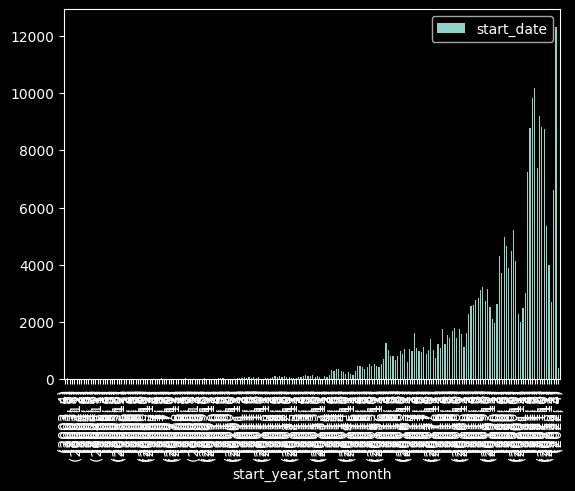

In [94]:
supplier_grouped.sort_index().plot.bar(y='start_date')
plt.show()

In [95]:
supplier_grouped

source_id  target_id  revenue_pct  start_date   type
start_year start_month                                                      
2003       4                  103        103          103         103    103
           5                   28         28           28          28     28
           6                    7          7            7           7      7
           7                    4          4            4           4      4
           8                    9          9            9           9      9
...                           ...        ...          ...         ...    ...
2021       12                3995       3995         3995        3995   3995
2022       1                 2693       2693         2693        2693   2693
           2                 6595       6595         6595        6595   6595
           3                12318      12318        12318       12318  12318
           4                  394        394          394         394    394

[210 rows x 5 columns]

We can split the data using the year. All the supplier relations uptil 2020 would be the training set, the year 2021 would be the validation set and the 2022 the test set.